In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import matplotlib.gridspec as gridspec
import scipy
from PIL import Image

In [30]:
df = pd.read_csv('decals_smooth_may_eval_shards/mac_catalog.csv')

In [31]:
df['bar_strong']  # missing the latest values

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: bar_strong, Length: 5000, dtype: float64

In [32]:
full_df = pd.read_csv('../data/decals/prepared_catalogs/decals_smooth_may/full_catalog.csv')

In [33]:
retired = full_df[full_df['smooth-or-featured_total-votes'] > 35]

(0.0, 30.0)

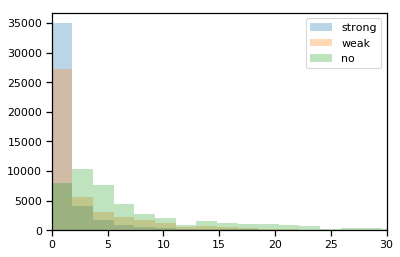

In [34]:
n_bins=20
alpha = 0.3
_, bins, _ = plt.hist(retired['bar_strong'], bins=n_bins, alpha=alpha, label='strong')
plt.hist(retired['bar_weak'], bins=bins, alpha=alpha, label='weak')
plt.hist(retired['bar_no'], bins=bins, alpha=alpha, label='no')
plt.legend()
plt.xlim([0., 30.])

(0.0, 1.0)

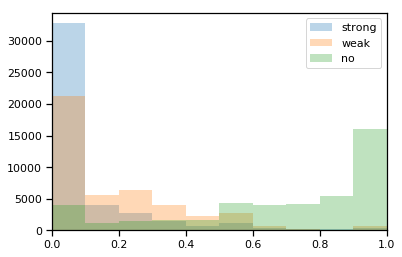

In [35]:
n_bins=10
alpha = 0.3
_, bins, _ = plt.hist(retired['bar_strong_fraction'], bins=n_bins, alpha=alpha, label='strong')
plt.hist(retired['bar_weak_fraction'], bins=bins, alpha=alpha, label='weak')
plt.hist(retired['bar_no_fraction'], bins=bins, alpha=alpha, label='no')
plt.legend()
plt.xlim([0., 1.])

In [36]:
# del retired['file_loc']

In [37]:
# small_df = pd.merge(df[['id_str', 'file_loc']], retired, on='id_str', how='inner')

In [38]:
# len(small_df)

In [39]:
# small_df['file_loc'] = '/data/repos/zoobot/notebooks/' + small_df['file_loc']

In [40]:
# assert all(small_df['file_loc'].apply(os.path.exists))

In [41]:
# os.chdir('/data/repos/zoobot')

In [42]:
# small_df.to_csv('notebooks/decals_smooth_may_eval_shards/mac_catalog_correct_labels.csv', index=False)

In [43]:
# bar_df = small_df[small_df['bar_total-votes'] >= 10]
# bar_df.to_csv(tfrecord_csv_loc, index=False)
# tfrecord_csv_loc = '/data/repos/zoobot/notebooks/decals_smooth_may_eval_shards/mac_catalog_feat10_correct_labels.csv'

In [44]:
# eval_size = int(len(bar_df)/4)

In [45]:
# !python /data/repos/zoobot/make_decals_tfrecords.py --labelled-catalog={tfrecord_csv_loc} --eval-size={eval_size} --shard-dir=/data/repos/zoobot/data/decals/shards/multilabel --img-size 64

In [54]:
bar_df = retired[retired['bar_total-votes'] >= 10]

In [55]:
eval_size = int(len(bar_df)/4)
img_size=256

In [57]:
tfrecord_csv_loc = '/data/repos/zoobot/notebooks/decals_smooth_may_eval_shards/mac_catalog_feat10_correct_labels_full_{}.csv'.format(img_size)
bar_df.to_csv(tfrecord_csv_loc, index=False)

In [58]:
!python /data/repos/zoobot/make_decals_tfrecords.py --labelled-catalog={tfrecord_csv_loc} --eval-size={eval_size} --shard-dir=/data/repos/zoobot/data/decals/shards/multilabel_{img_size} --img-size {img_size}


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Traceback (most recent call last):
  File "/data/repos/zoobot/make_decals_tfrecords.py", line 58, in <module>
    shard_size=shard_size
  File "/Data/repos/zoobot/zoobot/active_learning/database.py", line 187, in write_catalog_to_tfrecord_shards
    reader=catalog_to_tfrecord.get_reader(df['file_loc']),
  File "/Data/repos/zoobot/zoobot/tfrecord/catalog_to_tfrecord.py", line 71, in get_reader
    assert all(os.path.isfile(loc) for loc in paths)
AssertionError
